# Imports

In [1]:
from truthnet import truthnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import statsmodels.stats.api as sms
from datetime import datetime
import glob
from zedstat import zedstat

from sklearn.ensemble import (
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.metrics import (
    PrecisionRecallDisplay,
    RocCurveDisplay,
    auc,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_curve,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

# Global

In [8]:
disson = pd.read_pickle("disson_global/disson_qmr_global_random_order_0.pkl")

In [9]:
def _dissonance_data_at_question(dissonances, questions_asked):
    return np.array(
        [np.hstack([d[questions_asked - 1] for d in diss]) for diss in dissonances]
    )


def _diss_dataset(dissonances, questions_asked, groups=["qsampled", "m2"]):
    diss_dataset = pd.concat(
        [
            pd.DataFrame(
                _dissonance_data_at_question(dissonances[group], questions_asked)
            ).assign(y=group)
            for group in groups
        ]
    )
    return diss_dataset

In [12]:
import os

os.mkdir("disson_global/csv/")

[os.mkdir(f"disson_global/csv/{i}/") for i in range(10)]

[None, None, None, None, None, None, None, None, None, None]

In [10]:
for i in tqdm(range(10)):
    disson = pd.read_pickle(f"disson_global/disson_qmr_global_random_order_{i}.pkl")

    [
        _diss_dataset(disson, questions, groups=["qsampled", "m2", "runif"]).to_csv(
            f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions}.csv",
            index=False,
        )
        for questions in range(1, 345)
    ]

  0%|          | 0/10 [00:00<?, ?it/s]

In [7]:
i = 0

questions_asked = 344
pd.read_csv(
    f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions_asked}.csv"
)

,0,1,2,3,4,5,6,7,8,9,...,1023,1024,1025,1026,1027,1028,1029,1030,1031,y
0,0.000000,0.000000,0.000000,0.794812,0.000000,0.000000,0.000000,0.000000,0.696368,0.000000,...,0.000000,0.5,0.000000,0.000000,0.615270,0.0,0.000000,0.000000,0.8125,qsampled
1,0.571429,0.000000,0.000000,0.000000,0.333333,0.000000,0.705244,0.000000,0.000000,0.000000,...,0.000000,1.0,0.357143,0.549041,0.000000,0.0,0.000000,0.702948,0.0000,qsampled
2,0.000000,0.111111,0.000000,0.793992,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,...,0.000000,1.0,0.357143,0.000000,0.899822,0.0,0.000000,0.000000,0.0000,qsampled
3,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.357143,0.000000,0.660261,0.0,0.000000,0.861169,0.0000,qsampled
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.668270,0.000000,0.000000,0.000000,...,0.000000,1.0,0.357143,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,qsampled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000,0.111111,0.000000,0.000000,0.333333,0.000000,0.000000,0.835823,0.000000,0.791297,...,0.857143,0.0,0.928571,0.905052,0.666981,0.0,0.000000,0.000000,0.9375,runif
296,0.571429,0.000000,0.000000,0.000000,0.894737,0.883020,0.705244,0.000000,0.000000,0.000000,...,1.000000,0.5,1.000000,0.909660,0.893288,0.0,0.000000,0.889973,0.9375,runif
297,0.000000,0.000000,0.000000,0.749736,1.000000,0.961355,0.000000,0.836099,0.000000,0.772355,...,0.000000,0.5,0.000000,0.656198,0.893239,0.0,0.941176,0.882464,0.9375,runif
298,0.000000,0.111111,0.706564,0.000000,0.333333,0.866742,0.000000,0.842221,0.661431,0.772355,...,0.857143,1.0,0.357143,0.909660,0.670313,1.0,0.000000,0.854876,0.7500,runif


In [4]:
questions_asked = 1
pd.read_csv(
    f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions_asked}.csv"
)

,0,1,2,y
0,0.000000,0.000000,0.000000,qsampled
1,0.000000,0.000000,0.000000,qsampled
2,0.000000,0.000000,0.000000,qsampled
3,0.000000,0.000000,0.000000,qsampled
4,0.000000,0.000000,0.000000,qsampled
...,...,...,...,...
295,0.000000,0.000000,0.000000,runif
296,0.000000,0.000000,0.000000,runif
297,0.897436,0.909091,0.882353,runif
298,0.000000,0.000000,0.000000,runif


In [5]:
questions_asked = 2
pd.read_csv(
    f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions_asked}.csv"
)

,0,1,2,3,4,5,y
0,0.000000,0.000000,0.000000,0.0000,0.000000,0.4,qsampled
1,0.000000,0.052632,0.000000,0.0625,0.000000,0.4,qsampled
2,0.000000,0.000000,0.000000,0.0000,0.000000,0.4,qsampled
3,0.000000,0.894737,0.000000,0.9375,0.000000,0.8,qsampled
4,0.000000,0.000000,0.000000,0.0000,0.000000,0.4,qsampled
...,...,...,...,...,...,...,...
295,0.000000,0.578947,0.000000,0.8125,0.000000,0.0,runif
296,0.000000,0.894737,0.000000,0.9375,0.000000,0.8,runif
297,0.897436,0.052632,0.909091,0.0625,0.882353,0.4,runif
298,0.000000,0.894737,0.000000,0.9375,0.000000,0.8,runif


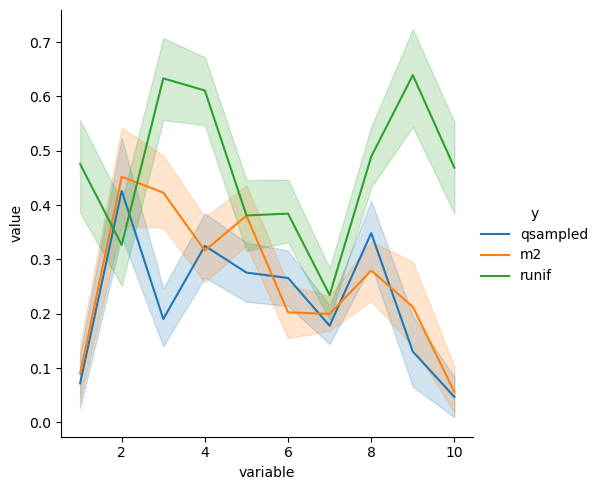

In [20]:
groups = ["qsampled", "runif", "m2"]
questions_asked = 10
df = (
    pd.read_csv(
        f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions_asked}.csv"
    )
    .query("y.isin(@groups)")
    .iloc[:, np.r_[:questions_asked, -1]]
)
df = pd.melt(df, id_vars="y")
df["variable"] = (df["variable"].astype(int) % questions_asked) + 1

sns.relplot(data=df, x="variable", y="value", hue="y", kind="line")

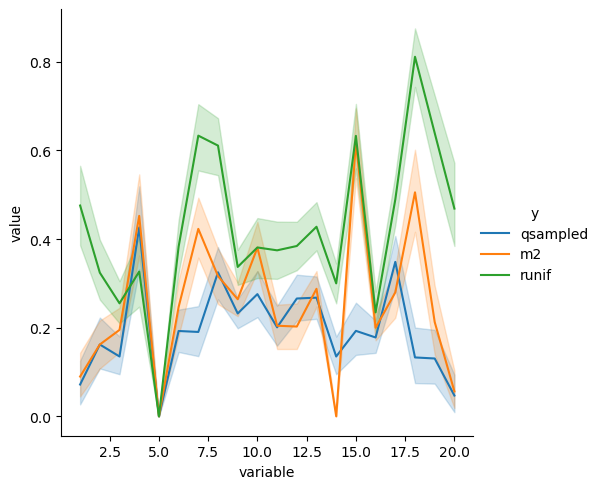

In [21]:
groups = ["qsampled", "runif", "m2"]
questions_asked = 20
df = (
    pd.read_csv(
        f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions_asked}.csv"
    )
    .query("y.isin(@groups)")
    .iloc[:, np.r_[:questions_asked, -1]]
)
df = pd.melt(df, id_vars="y")
df["variable"] = (df["variable"].astype(int) % questions_asked) + 1

sns.relplot(data=df, x="variable", y="value", hue="y", kind="line")

In [ ]:
dff = pd.concat(
    [
        pd.concat(
            [
                pd.read_csv(
                    f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions_asked}.csv"
                ).iloc[:, np.r_[:questions_asked]],
                # .mean(axis=1, numeric_only=True),
                pd.read_csv(
                    f"disson_global/csv/{i}/disson_qmr_global_random_order_{i}-questions_asked_{questions_asked}.csv"
                )["y"],
            ],
            axis=1,
        )
        # .groupby("y", as_index=False)
        # .mean()
        .assign(questions=str(questions_asked))
        for questions_asked in range(1, 345)
        for i in range(10)
    ]
)

# sns.relplot(data=dff, x="questions", y=0, hue="y", kind="line")

In [ ]:
sns.relplot(data=dff, x="questions", y=0, hue="y", kind="line")

In [74]:
dff.query("questions=='344'")

,0,y,questions,1,2,3,4,5,6,7,...,334,335,336,337,338,339,340,341,342,343
0,0.000000,qsampled,344,0.000000,0.000000,0.794812,0.000000,0.000000,0.000000,0.000000,...,0.826911,0.000000,0.000000,0.308824,0.000000,0.317497,0.0,0.00000,0.000000,0.87500
1,0.571429,qsampled,344,0.000000,0.000000,0.000000,0.333333,0.000000,0.705244,0.000000,...,0.000000,0.000000,0.712329,0.000000,0.508339,0.000000,0.0,0.00000,0.677410,0.00000
2,0.000000,qsampled,344,0.111111,0.000000,0.793992,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.721637,0.5,0.00000,0.000000,0.00000
3,0.000000,qsampled,344,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.750725,0.000000,0.500000,0.000000,0.000000,0.324568,0.0,0.00000,0.852844,0.00000
4,0.000000,qsampled,344,0.000000,0.000000,0.000000,0.000000,0.000000,0.668270,0.000000,...,0.000000,0.000000,0.500000,0.196078,0.000000,0.000000,0.5,0.00000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.571429,runif,344,0.111111,0.706499,0.000000,0.000000,0.872681,0.334798,0.000000,...,0.750751,0.909091,0.525000,0.000000,0.813717,0.000000,0.0,0.00000,0.831781,0.96875
296,0.000000,runif,344,0.111111,0.705754,0.788216,0.333333,0.865758,0.668270,0.822411,...,0.000000,0.000000,0.178082,0.196078,0.803598,0.837315,0.0,0.96875,0.000000,0.96875
297,0.000000,runif,344,0.111111,0.000000,0.788449,0.333333,0.890339,0.345941,0.873394,...,0.884034,0.000000,0.748744,0.842857,0.560203,0.258442,0.0,0.00000,0.980082,0.84375
298,0.000000,runif,344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.917578,0.000000,0.273973,0.032967,0.796104,0.708009,0.5,1.00000,0.000000,0.84375


In [54]:
int(str(5))

5

In [73]:
questions = str(344)
dff.query("questions==@questions")[[str(x) for x in range(int(questions))]].iloc[
    :, -1
].mean()

0.4288958333333333

In [59]:
dff.query("questions==@questions")[[str(x) for x in range(int(questions))]].iloc[
    :, -1
].var()

0.1327600476574053

In [83]:
dff

,0,y,questions,1,2,3,4,5,6,7,...,334,335,336,337,338,339,340,341,342,343
0,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.571429,runif,344,0.111111,0.706499,0.000000,0.000000,0.872681,0.334798,0.000000,...,0.750751,0.909091,0.525000,0.000000,0.813717,0.000000,0.0,0.00000,0.831781,0.96875
296,0.000000,runif,344,0.111111,0.705754,0.788216,0.333333,0.865758,0.668270,0.822411,...,0.000000,0.000000,0.178082,0.196078,0.803598,0.837315,0.0,0.96875,0.000000,0.96875
297,0.000000,runif,344,0.111111,0.000000,0.788449,0.333333,0.890339,0.345941,0.873394,...,0.884034,0.000000,0.748744,0.842857,0.560203,0.258442,0.0,0.00000,0.980082,0.84375
298,0.000000,runif,344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.917578,0.000000,0.273973,0.032967,0.796104,0.708009,0.5,1.00000,0.000000,0.84375


In [107]:
res_df = list()
conf = 0.95
for questions in tqdm(range(1, 345)):
    for group in ["qsampled", "runif", "m2"]:
        quest = str(questions)
        dfq = dff.query("questions==@quest & y==@group")[
            [str(x) for x in range(int(quest))]
        ].iloc[:, -1]
        mean = dfq.mean()
        var = dfq.var()
        ci = sms.DescrStatsW(dfq).tconfint_mean(alpha=1 - conf)
        res_df.append([group, questions, mean, var, ci[0], ci[1]])

  0%|          | 0/344 [00:00<?, ?it/s]

In [110]:
df = pd.DataFrame(
    res_df, columns=["variable", "questions", "mean", "var", "lower", "upper"]
)

In [111]:
df.to_csv("diss_comp_global_linear_rand_order.csv", index=False)

In [92]:
pd.melt(df, id_vars=["group", "questions"])

,group,questions,variable,value
0,qsampled,1,mean,0.159790
1,runif,1,mean,0.422695
2,qsampled,2,mean,0.209845
3,runif,2,mean,0.480853
4,qsampled,3,mean,0.219677
...,...,...,...,...
2747,runif,342,upper,0.732272
2748,qsampled,343,upper,0.309893
2749,runif,343,upper,0.732272
2750,qsampled,344,upper,0.309893


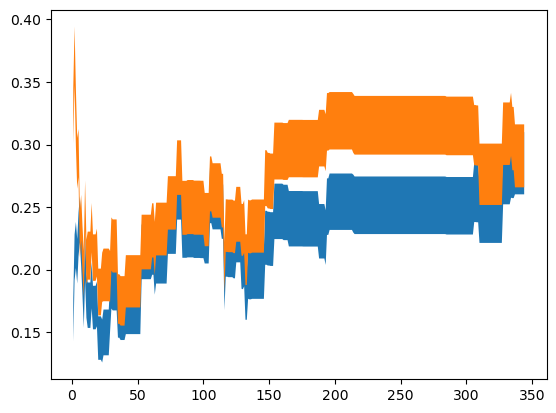

In [113]:
fig, ax = plt.subplots()
ax.fill_between(
    df.query('variable=="qsampled"')["questions"],
    df.query('variable=="qsampled"')["lower"],
    df.query('variable=="qsampled"')["upper"],
)
ax.fill_between(
    df.query('variable=="runif"')["questions"],
    df.query('variable=="m2"')["lower"],
    df.query('variable=="m2"')["upper"],
)

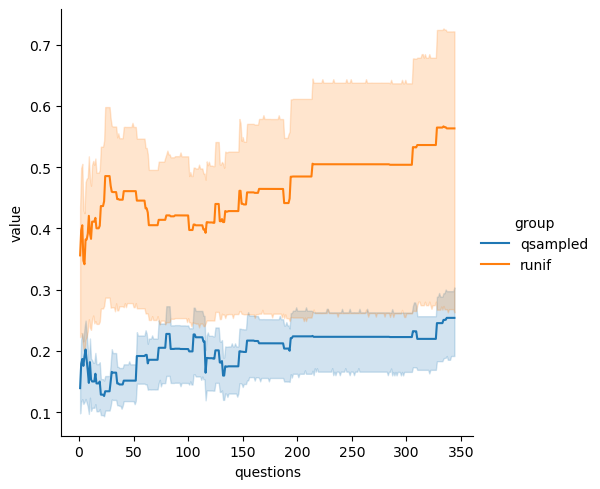

In [94]:
sns.relplot(
    data=pd.melt(df, id_vars=["group", "questions"]),
    x="questions",
    y="value",
    hue="group",
    kind="line",
)

In [26]:
dff

,0,y,questions,1,2,3,4,5,6,7,...,334,335,336,337,338,339,340,341,342,343
0,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,qsampled,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.571429,runif,344,0.111111,0.706499,0.000000,0.000000,0.872681,0.334798,0.000000,...,0.750751,0.909091,0.525000,0.000000,0.813717,0.000000,0.0,0.00000,0.831781,0.96875
296,0.000000,runif,344,0.111111,0.705754,0.788216,0.333333,0.865758,0.668270,0.822411,...,0.000000,0.000000,0.178082,0.196078,0.803598,0.837315,0.0,0.96875,0.000000,0.96875
297,0.000000,runif,344,0.111111,0.000000,0.788449,0.333333,0.890339,0.345941,0.873394,...,0.884034,0.000000,0.748744,0.842857,0.560203,0.258442,0.0,0.00000,0.980082,0.84375
298,0.000000,runif,344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.917578,0.000000,0.273973,0.032967,0.796104,0.708009,0.5,1.00000,0.000000,0.84375


In [28]:
dffm

,y,questions,variable,value
0,qsampled,1,0,0.00000
1,qsampled,1,0,0.00000
2,qsampled,1,0,0.00000
3,qsampled,1,0,0.00000
4,qsampled,1,0,0.00000
...,...,...,...,...
355007995,runif,344,343,0.96875
355007996,runif,344,343,0.96875
355007997,runif,344,343,0.84375
355007998,runif,344,343,0.84375


In [27]:
dffm = pd.melt(dff, id_vars=["y", "questions"])

In [44]:
dffm["value"].mean()

0.32429267115258215

In [42]:
dffm["value"].dropna()

0            0.00000
1            0.00000
2            0.00000
3            0.00000
4            0.00000
              ...   
355007995    0.96875
355007996    0.96875
355007997    0.84375
355007998    0.84375
355007999    0.87500
Name: value, Length: 178020000, dtype: float64

In [36]:
conf = 0.95
dffm_ci_var = dffm.groupby(["questions", "y", "variable"], as_index=False).agg(
    mean=pd.NamedAgg(column="value", aggfunc=lambda x: x.dropna().mean()),
    var=pd.NamedAgg(column="value", aggfunc=lambda x: x.dropna().var()),
    ci=pd.NamedAgg(
        column="value",
        aggfunc=lambda x: sms.DescrStatsW(x.dropna()).tconfint_mean(alpha=1 - conf),
    ),
)

In [45]:
dffm.query("y=='m2' & variable=='1'")

,y,questions,variable,value
1032100,m2,1,1,NaN
1032101,m2,1,1,NaN
1032102,m2,1,1,NaN
1032103,m2,1,1,NaN
1032104,m2,1,1,NaN
...,...,...,...,...
2063895,m2,344,1,0.111111
2063896,m2,344,1,0.111111
2063897,m2,344,1,0.111111
2063898,m2,344,1,0.000000


In [37]:
dffm_ci_var

,questions,y,variable,mean,var,ci
0,1,m2,0,0.323021,0.128233,"(0.3007998286746782, 0.3452430220938992)"
1,1,m2,1,NaN,NaN,"(nan, nan)"
2,1,m2,10,NaN,NaN,"(nan, nan)"
3,1,m2,100,NaN,NaN,"(nan, nan)"
4,1,m2,101,NaN,NaN,"(nan, nan)"
...,...,...,...,...,...,...
355003,99,runif,95,0.588714,0.172600,"(0.562933053745424, 0.614494456797793)"
355004,99,runif,96,0.533005,0.176492,"(0.5069356174242903, 0.5590750730962919)"
355005,99,runif,97,0.425421,0.179024,"(0.3991650636392856, 0.4516772945668206)"
355006,99,runif,98,0.504850,0.169684,"(0.4792883133481795, 0.5304123453221504)"


In [22]:
dff_ci_var

,questions,y,mean,var,ci
0,1,m2,NaN,NaN,"(nan, nan)"
1,1,qsampled,NaN,NaN,"(nan, nan)"
2,1,runif,NaN,NaN,"(nan, nan)"
3,10,m2,0.240249,0.097403,"(0.22088242357034335, 0.25961635014395423)"
4,10,qsampled,0.245922,0.099377,"(0.2263602897391976, 0.2654846832766801)"
...,...,...,...,...,...
1027,98,qsampled,0.140702,0.080921,"(0.12304956330459133, 0.15835441151751706)"
1028,98,runif,0.330864,0.134696,"(0.3080894998888417, 0.35363887217888323)"
1029,99,m2,0.122859,0.068506,"(0.1066166445370311, 0.13910049083879422)"
1030,99,qsampled,0.140702,0.080921,"(0.12304956330459133, 0.15835441151751706)"


In [18]:
dff_ci_var.query('y=="m2"').assign(
    questions=lambda x: x["questions"].astype(int)
).sort_values(by="questions").head(20)

,questions,y,mean,var,ci
0,1,m2,0.323021,0.128233,"(0.3007998286746782, 0.3452430220938992)"
333,2,m2,0.277165,0.057322,"(0.2623080602472067, 0.29202227104679884)"
666,3,m2,0.260442,0.036026,"(0.24866403261134043, 0.27222050511060814)"
834,4,m2,0.256554,0.026417,"(0.24646816406943817, 0.2666400401473028)"
867,5,m2,0.272485,0.020487,"(0.26360317290289426, 0.2813671648918764)"
900,6,m2,0.275231,0.016290,"(0.26731076615539867, 0.28315122002804)"
933,7,m2,0.278409,0.013296,"(0.27125337319180437, 0.28556442660307896)"
966,8,m2,0.271083,0.012029,"(0.26427678309716934, 0.27788876013035396)"
999,9,m2,0.274638,0.011238,"(0.268059285275497, 0.2812159614762683)"
3,10,m2,0.278312,0.009273,"(0.2723367817249185, 0.2842880526978704)"


In [22]:
dff.query("questions=='2' & y=='runif'")

,0,y,questions
200,0.448718,runif,2
201,0.236842,runif,2
202,0.236842,runif,2
203,0.000000,runif,2
204,0.475034,runif,2
...,...,...,...
295,0.000000,runif,2
296,0.000000,runif,2
297,0.214286,runif,2
298,0.000000,runif,2


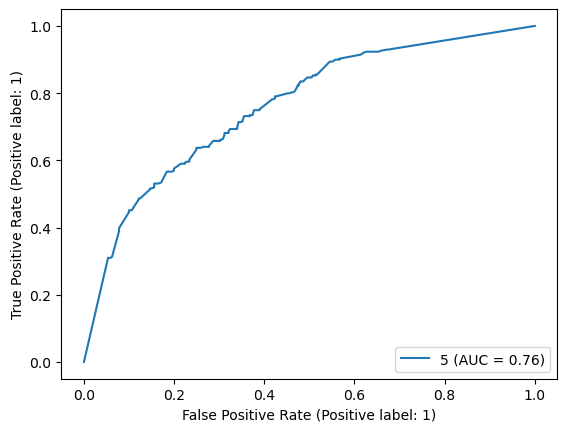

In [4]:
groups = ["qsampled", "runif"]

questions_asked = str(5)
data = dff.query("questions==@questions_asked & y.isin(@groups)")
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(["y", "questions"], axis="columns"), data["y"], test_size=0.33
)

fig, ax = plt.subplots()

classifier = RandomForestClassifier(n_estimators=20)

classifier.fit(
    X_train.to_numpy(),
    y_train.replace(
        {
            groups[0]: 0,
            groups[1]: 1,
        }
    ),
)

r = RocCurveDisplay.from_estimator(
    classifier,
    X_test.to_numpy(),
    y_test.replace(
        {
            groups[0]: 0,
            groups[1]: 1,
        }
    ),
    pos_label=1,
    ax=ax,
    name=questions_asked,
)

In [41]:
X_train

,0
257,0.137020
97,0.333152
248,0.626659
297,0.112047
13,0.173154
...,...
230,0.736669
221,0.188493
264,0.435492
214,0.211836


In [54]:
data.groupby("y", as_index=False).max()

,y,0,questions
0,qsampled,0.671913,5
1,runif,0.897781,5


In [55]:
data.groupby("y", as_index=False).min()

,y,0,questions
0,qsampled,0.0,5
1,runif,0.0,5


In [5]:
data

,0,y,questions
0,0.000000,qsampled,5
1,0.121340,qsampled,5
2,0.174450,qsampled,5
3,0.316497,qsampled,5
4,0.277247,qsampled,5
...,...,...,...
295,0.319219,runif,5
296,0.264674,runif,5
297,0.270815,runif,5
298,0.156010,runif,5


In [7]:
conf = 0.95

data.groupby(["questions", "y"], as_index=False).agg(
    mean=pd.NamedAgg(column=0, aggfunc="mean"),
    var=pd.NamedAgg(column=0, aggfunc="var"),
    ci=pd.NamedAgg(
        column=0,
        aggfunc=lambda x: sms.DescrStatsW(x).tconfint_mean(alpha=1 - conf),
    ),
)

,questions,y,mean,var,ci
0,5,qsampled,0.211150,0.016153,"(0.20326299303247353, 0.21903680303560336)"
1,5,runif,0.410888,0.027170,"(0.4006597602889369, 0.42111716521506004)"


In [ ]:
d

# PTSD

In [2]:
def _dissonance_data_at_question(dissonances, questions_asked):
    return np.array(
        [np.hstack([d[questions_asked - 1] for d in diss]) for diss in dissonances]
    )


def _diss_dataset(dissonances, questions_asked, groups=["qsampled", "m2"]):
    diss_dataset = pd.concat(
        [
            pd.DataFrame(
                _dissonance_data_at_question(dissonances[group], questions_asked)
            ).assign(y=group)
            for group in groups
        ]
    )
    return diss_dataset

In [4]:
import os

os.mkdir("disson_ptsd/")
os.mkdir("disson_ptsd/csv/")

[os.mkdir(f"disson_ptsd/csv/{i}/") for i in range(10)]

[None, None, None, None, None, None, None, None, None, None]

In [5]:
for i in tqdm(range(10)):
    disson = pd.read_pickle(f"disson/disson_qmr_random_order_{i}.pkl")

    [
        _diss_dataset(disson, questions, groups=["qsampled", "m2", "runif"]).to_csv(
            f"disson_ptsd/csv/{i}/disson_qmr_ptsd_random_order_{i}-questions_asked_{questions}.csv",
            index=False,
        )
        for questions in range(1, 212)
    ]

  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
dff = pd.concat(
    [
        pd.concat(
            [
                pd.read_csv(
                    f"disson_ptsd/csv/{i}/disson_qmr_ptsd_random_order_{i}-questions_asked_{questions_asked}.csv"
                ).iloc[:, np.r_[:questions_asked]],
                # .mean(axis=1, numeric_only=True),
                pd.read_csv(
                    f"disson_ptsd/csv/{i}/disson_qmr_ptsd_random_order_{i}-questions_asked_{questions_asked}.csv"
                )["y"],
            ],
            axis=1,
        )
        # .groupby("y", as_index=False)
        # .mean()
        .assign(questions=str(questions_asked))
        for questions_asked in range(1, 212)
        for i in range(10)
    ]
)

# sns.relplot(data=dff, x="questions", y=0, hue="y", kind="line")

In [4]:
res_df = list()
conf = 0.95
for questions in tqdm(range(1, 212)):
    for group in ["qsampled", "runif", "m2"]:
        quest = str(questions)
        dfq = dff.query("questions==@quest & y==@group")[
            [str(x) for x in range(int(quest))]
        ].iloc[:, -1]
        mean = dfq.mean()
        var = dfq.var()
        ci = sms.DescrStatsW(dfq).tconfint_mean(alpha=1 - conf)
        res_df.append([group, questions, mean, var, ci[0], ci[1]])

  0%|          | 0/211 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame(
    res_df, columns=["variable", "questions", "mean", "var", "lower", "upper"]
)

In [6]:
df

,variable,questions,mean,var,lower,upper
0,qsampled,1,0.259514,0.091344,0.240759,0.278269
1,runif,1,0.468232,0.118111,0.446905,0.489558
2,m2,1,0.407204,0.097209,0.387856,0.426552
3,qsampled,2,0.227124,0.077820,0.209813,0.244435
4,runif,2,0.401140,0.116130,0.379993,0.422286
...,...,...,...,...,...,...
628,runif,210,0.349993,0.092983,0.331070,0.368915
629,m2,210,0.263908,0.073949,0.247033,0.280783
630,qsampled,211,0.326786,0.088380,0.308338,0.345234
631,runif,211,0.348906,0.093468,0.329935,0.367878


In [7]:
df.to_csv("diss_comp_ptsd_linear_rand_order.csv", index=False)

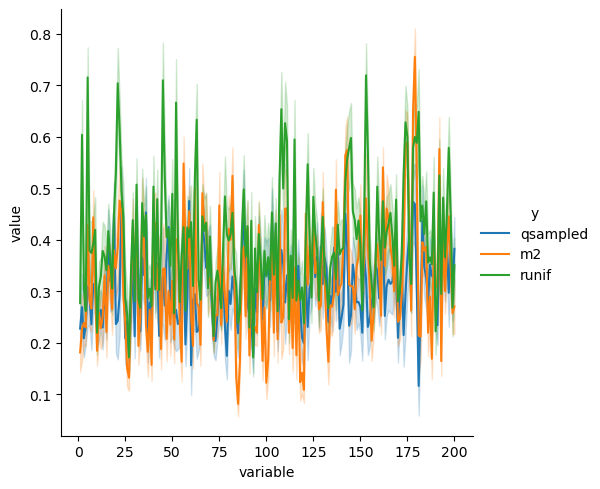

In [10]:
groups = ["qsampled", "runif", "m2"]
questions_asked = 200
i = 0

df = (
    pd.read_csv(
        f"disson_ptsd/csv/{i}/disson_qmr_ptsd_random_order_{i}-questions_asked_{questions_asked}.csv"
    )
    .query("y.isin(@groups)")
    .iloc[:, np.r_[:questions_asked, -1]]
)
df = pd.melt(df, id_vars="y")
df["variable"] = (df["variable"].astype(int) % questions_asked) + 1

sns.relplot(data=df, x="variable", y="value", hue="y", kind="line")